# Visualizations on Sales Data

## Objective:
The objective of this dashboard is to understand sales trends for one of the leading 
pharmaceutical company. 
The client would like to come see a dynamic dashboard with different KPI's at different 
levels (National, Region & Territory etc). Create the below charts as these would help us 
explore the past data in a better manner and give a good picture of the progress and 
failures. This in turn would catalyse the decision-making process, making it easier, simpler 
and accurate.

### Import necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the data set

In [4]:
sales = pd.read_csv('SalesData.csv')
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [5]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [6]:
sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart.

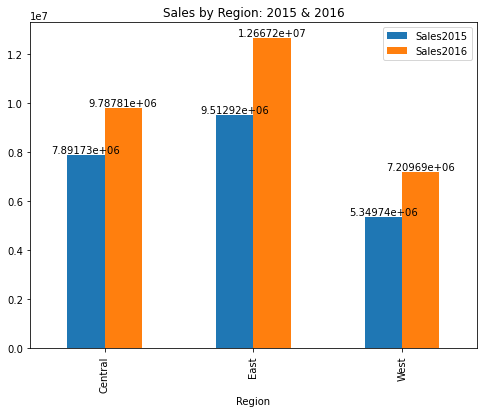

In [31]:
ax = sales.groupby('Region')[['Sales2015', 'Sales2016']].sum().plot(kind = 'bar', figsize = (8,6), title = 'Region Wise Sales: 2015 & 2016')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

<AxesSubplot:title={'center':'Region Wise Sales: 2016'}, ylabel='Sales2016'>

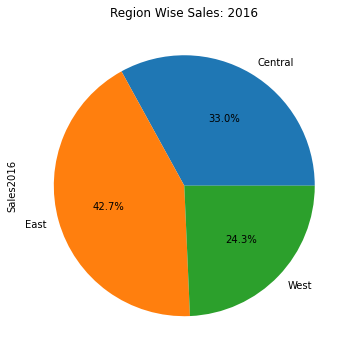

In [36]:
sales.groupby(['Region']).Sales2016.sum().plot(kind = 'pie', autopct = '%.1f%%', figsize = (8,6), title = 'Region Wise Sales: 2016')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers.

<AxesSubplot:title={'center':'Tier Wise Sales Comparison for each Region'}, xlabel='Region,Tier'>

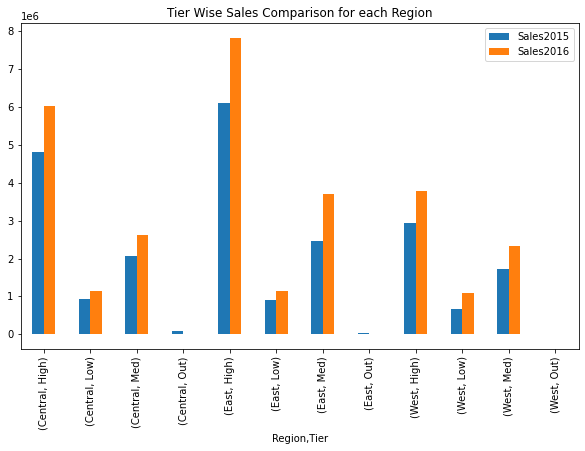

In [41]:
sales.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum().plot(kind = 'bar', figsize = (10,6), title = 'Tier Wise Sales Comparison for each Region')

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [49]:
east_sales = sales.loc[sales['Region'] == 'East'].groupby(['State'])[['Sales2015', 'Sales2016']].sum()

<AxesSubplot:title={'center':'State Wise East Region Sales Comparison: 2015 & 2016'}, xlabel='State'>

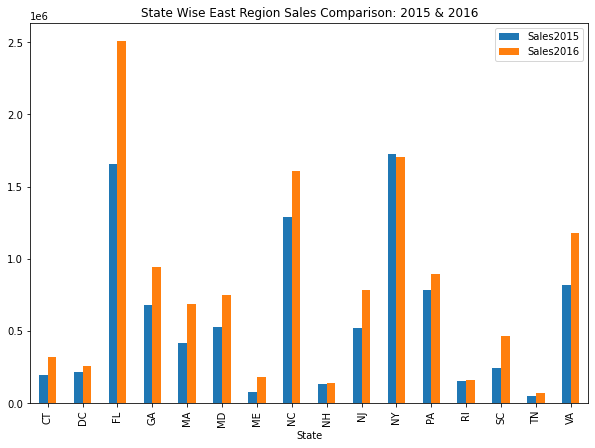

In [52]:
east_sales.plot(kind = 'bar', figsize = (10, 7), title = 'State Wise East Region Sales Comparison: 2015 & 2016')

NY state shows the drop in sales in 2016 as compared to 2015, in East region.

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [54]:
high_tier = sales.loc[sales['Tier'] == 'High'].groupby(['Division'])[['Units2015', 'Units2016']].sum()

<AxesSubplot:title={'center':'Division Wise High Tier Sales Comparison: 2015 & 2016'}, xlabel='Division'>

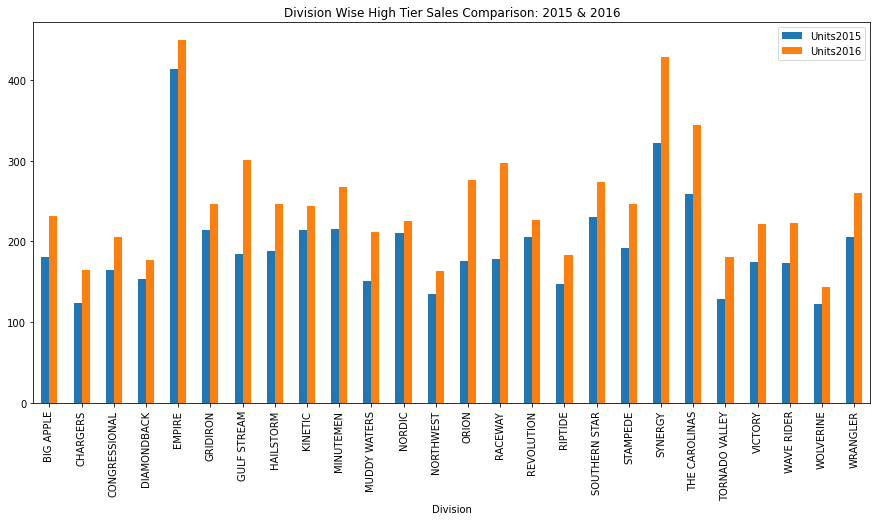

In [59]:
high_tier.plot(kind = 'bar', figsize = (15,7), title = 'Division Wise High Tier Sales Comparison: 2015 & 2016')

There is no division with drop in sales in 2016 as compared to 2015 in High tier.

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4 

In [62]:
sales['Qtr'] = np.where(sales.Month.isin(['Jan', 'Feb', 'Mar']), 'Q1', np.where(sales.Month.isin(['Apr', 'May', 'Jun']), 'Q2', np.where(sales.Month.isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))

In [63]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot.

<AxesSubplot:title={'center':'Qtr Wise Sales Comparison: 2015 & 2016'}, xlabel='Qtr'>

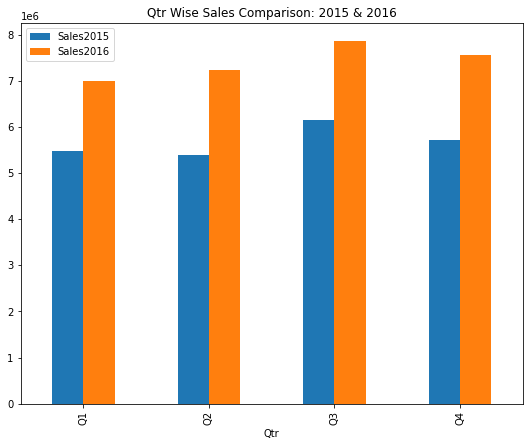

In [68]:
sales.groupby('Qtr')[['Sales2015', 'Sales2016']].sum().plot(kind ='bar', figsize = (9, 7), title = 'Qtr Wise Sales Comparison: 2015 & 2016')

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)


In [116]:
qtr_data = sales.groupby(['Tier', 'Qtr'])[['Sales2016']].sum().reset_index()
qtr_data['Sales2016'] = qtr_data['Sales2016'].abs()

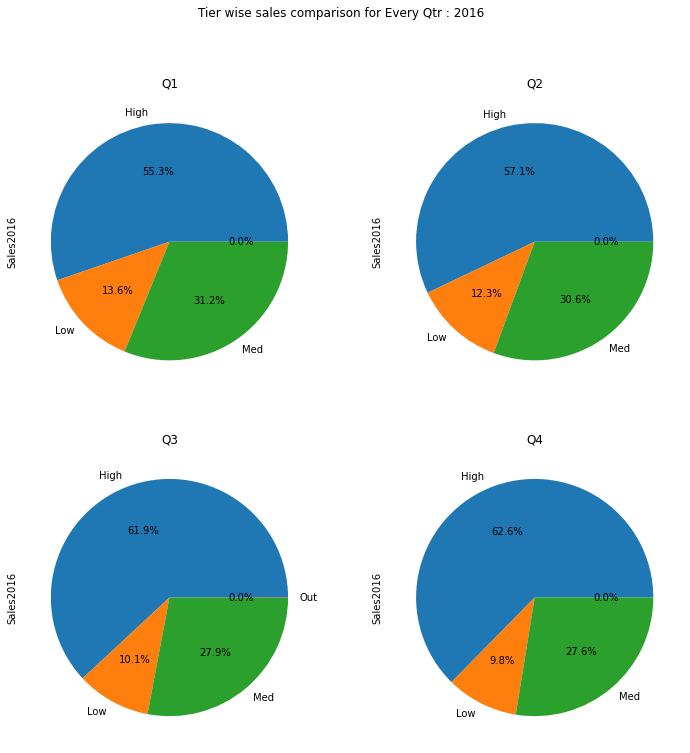

In [131]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
qtr_data[qtr_data['Qtr'] == 'Q1'].set_index(['Tier']).plot(ax = ax[0][0], kind = 'pie', title = 'Q1', y = 'Sales2016', legend = False, autopct = '%.1f%%')
qtr_data[qtr_data['Qtr'] == 'Q2'].set_index(['Tier']).plot(ax = ax[0][1], kind = 'pie', title = 'Q2', y = 'Sales2016', legend = False, autopct = '%.1f%%')
qtr_data[qtr_data['Qtr'] == 'Q3'].set_index(['Tier']).plot(ax = ax[1][0], kind = 'pie', title = 'Q3', y = 'Sales2016', legend = False, autopct = '%.1f%%')
qtr_data[qtr_data['Qtr'] == 'Q4'].set_index(['Tier']).plot(ax = ax[1][1], kind = 'pie', title = 'Q4', y = 'Sales2016', legend = False, autopct = '%.1f%%')
fig.suptitle('Tier wise sales comparison for Every Qtr : 2016')
plt.show()